In [1]:
import math
import scipy.linalg as spla
import matplotlib.pyplot as plt
import numpy as np

In [4]:
N = 50
M = 3 * N
X = np.random.uniform(size=(N,2))
k=20
i = np.zeros([M])
i[0] = 2
i[1] = -1
i[M-1] = -1

L = spla.circulant(i)

D = np.eye(M)
Lr = k*L + D
Lr_inv = spla.inv(L)

x_m = np.mean(X, axis = 0)
Y =  x_m + np.random.randn(M,2) * 0.001

b = 10
print(D)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [5]:
Distancex1 = np.outer(X[:,0], np.ones(M))
Distancey1 = np.outer(np.ones(N), Y[:,0])
Distancex2 = np.outer(X[:,1], np.ones(M))
Distancey2 = np.outer(np.ones(N), Y[:,1])
DistanceXY = (Distancex1 - Distancey1)**2 + (Distancex2 - Distancey2)**2
softmax_XY = np.exp(-b*DistanceXY)
P = softmax_XY / np.outer(np.sum(softmax_XY, axis=1), np.ones(M))

In [6]:
for i in range(500):

        Distancex1 = np.outer(X[:,0], np.ones(M))
        Distancey1 = np.outer(np.ones(N), Y[:,0])
        Distancex2 = np.outer(X[:,1], np.ones(M))
        Distancey2 = np.outer(np.ones(N), Y[:,1])
        DistanceXY = (Distancex1 - Distancey1)**2 + (Distancex2 - Distancey2)**2
        new_softmax_XY = np.exp(-b*DistanceXY)
        P = P*new_softmax_XY/((np.outer(np.sum(new_softmax_XY, axis =1), np.ones(M)) * np.outer(np.sum(P, axis= 1), np.ones(M))))
        D = np.diag(P.sum(axis=0))
        k = k/1.05
        Lr = k*L + D
        Lr_inv = spla.inv(Lr)
        Y =Lr_inv.dot(P.transpose().dot(X))

        max_cities = P.argmax(axis = 1)
        dist_tour = 0

        #calculating distance for the tour
        for a in range(len(max_cities)):
                c1 = np.array(Y[a])
                c2 = np.array(Y[a+1])
                x1, y1 = c1[0], c1[1]
                x2, y2 = c2[0], c2[1]
                Distxy = math.sqrt((x1 - y1)**2 + (x2-y2)**2)
                dist_tour += Distxy

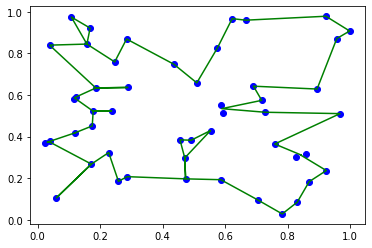

In [7]:
fig = plt.figure()

plt.plot(Y[:,0],Y[:,1], color="green")
plt.scatter(X[:,0], X[:,1], color = "blue")

plt.show()